In [1]:
# February 11st, 2020
# Analysis of the centrality output
# Requires eigen.csv from graph_tool-v2


In [2]:
import pandas as pd
import numpy as np
import csv

In [3]:
file='data/eigen.csv'
# df=pd.read_csv(file, chunksize=100, engine='c', lineterminator='\n', index_col='id')
df=pd.read_csv(file, engine='c', lineterminator='\n', index_col='id')

In [4]:
%matplotlib inline

In [5]:
# df.get_chunk()

In [6]:
# df=df.get_chunk()

In [7]:
df.describe()

,eigen,pagerank,katz
count,8527463.0,8.527463e+06,8.527463e+06
mean,0.0,1.172675e-07,3.168532e-04
std,0.0,2.738268e-07,1.298931e-04
min,0.0,4.420830e-08,2.804376e-04
25%,0.0,4.762617e-08,2.832730e-04
50%,0.0,6.296068e-08,2.915452e-04
75%,0.0,1.057848e-07,3.123279e-04
max,0.0,9.058616e-05,2.192118e-02


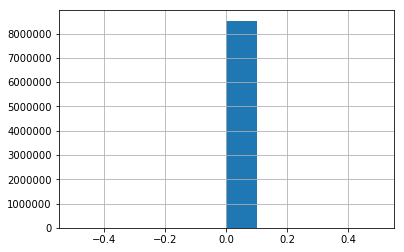

In [8]:
df.eigen.hist()

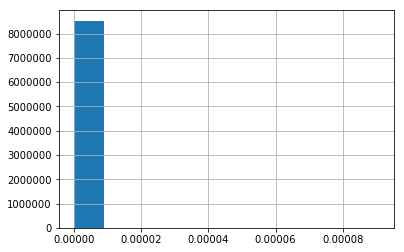

In [9]:
df.pagerank.hist()

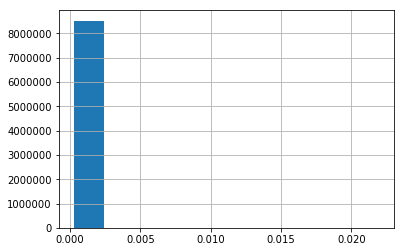

In [10]:
df.katz.hist()

In [11]:
df.corr()

,eigen,pagerank,katz
eigen,NaN,NaN,NaN
pagerank,NaN,1.000000,0.362489
katz,NaN,0.362489,1.000000


In [12]:
df.pagerank.nlargest(n=10)

id
4237224    0.000091
3813316    0.000078
4309756    0.000069
4558413    0.000067
4395486    0.000056
4683195    0.000053
3988545    0.000051
4683202    0.000051
4298685    0.000050
5572643    0.000038
Name: pagerank, dtype: float64

In [13]:
df.katz.nlargest(n=10)

id
5040715    0.021921
3490675    0.020738
4610383    0.020117
4429695    0.017953
4520817    0.017247
3079606    0.016568
4733665    0.016184
4728020    0.016069
4633874    0.015687
4892244    0.014854
Name: katz, dtype: float64